In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import ndimage, misc
import datetime
from datetime import timedelta

In [2]:
# Change presentation settings
%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (15.0, 8.0)
matplotlib.rcParams["xtick.labelsize"] = 16
matplotlib.rcParams["ytick.labelsize"] = 16
matplotlib.rcParams["axes.spines.left"] = True
matplotlib.rcParams["axes.spines.bottom"] = True
matplotlib.rcParams["axes.spines.right"] = True
matplotlib.rcParams["axes.spines.top"] = True
matplotlib.rcParams["axes.titlesize"] = 16
matplotlib.rcParams["figure.titlesize"] = 16
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14

In [3]:
lumi_directory = data_directory = "./lumi"

In [4]:
int_lumi = pd.read_csv(("%s/int_lumi.csv" % lumi_directory),
           names=["run:fill", "ls", "time", "beamstatus", "energy", "delivered", "recorded", "avgpu", "source"])

int_lumi2 = pd.read_csv(("%s/lumi_per_ls.csv" % lumi_directory),
           names=["run:fill", "ls", "time", "beamstatus", "energy", "delivered", "recorded", "avgpu", "source"])

In [5]:
int_lumi['run'], int_lumi['fill'] = int_lumi['run:fill'].str.split(':', 1).str
int_lumi2['run'], int_lumi2['fill'] = int_lumi2['run:fill'].str.split(':', 1).str
int_lumi['ls_start'], int_lumi['ls_end'] = int_lumi['ls'].str.split(':', 1).str
int_lumi2['ls_start'], int_lumi2['ls_end'] = int_lumi2['ls'].str.split(':', 1).str

In [7]:
int_lumi.drop(int_lumi.index[[0,1,2034,2035,2036]], inplace=True)
int_lumi2.drop(int_lumi2.index[[0,1,2034,2035,2036]], inplace=True)
#print int_lumi

In [8]:
int_lumi["run"] = int_lumi["run"].astype('int')
int_lumi2["run"] = int_lumi2["run"].astype('int')

#int_lumi["delivered"].dtype
#int_lumi2["run"].dtype

In [9]:
#print int_lumi2

In [10]:
int_lumi["delivered"] = int_lumi["delivered"].astype('float64')
int_lumi["recorded"] = int_lumi["recorded"].astype('float64')
int_lumi2["delivered"] = int_lumi2["delivered"].astype('float64')
int_lumi2["recorded"] = int_lumi2["recorded"].astype('float64') 

In [11]:
int_lumi["delivered"].dtype
int_lumi["inst_lumi_del"] = int_lumi["delivered"]/23;
int_lumi["inst_lumi_rec"] = int_lumi["recorded"]/23;

In [12]:
pd.to_datetime(int_lumi["time"])
pd.to_datetime(int_lumi2["time"])

print int_lumi2['time']

2       11/17/17 21:48:20
3       11/17/17 21:48:43
4       11/17/17 21:49:06
5       11/17/17 21:49:30
6       11/17/17 21:49:53
7       11/17/17 21:50:16
8       11/17/17 21:50:40
9       11/17/17 21:51:03
10      11/17/17 21:51:26
11      11/17/17 21:51:49
12      11/17/17 21:52:13
13      11/17/17 21:52:36
14      11/17/17 21:52:59
15      11/17/17 21:53:23
16      11/17/17 21:53:46
17      11/17/17 21:54:09
18      11/17/17 21:54:33
19      11/17/17 21:54:56
20      11/17/17 21:55:19
21      11/17/17 21:55:43
22      11/17/17 21:56:06
23      11/17/17 21:56:29
24      11/17/17 21:56:53
25      11/17/17 21:57:16
26      11/17/17 21:57:39
27      11/17/17 21:58:02
28      11/17/17 21:58:26
29      11/17/17 21:58:49
30      11/17/17 21:59:12
31      11/17/17 21:59:36
              ...        
2004    11/18/17 10:46:08
2005    11/18/17 10:46:31
2006    11/18/17 10:46:55
2007    11/18/17 10:47:18
2008    11/18/17 10:47:41
2009    11/18/17 10:48:05
2010    11/18/17 10:48:28
2011    11/1

In [13]:
def addTimeOffSet(data):
    startdate = data.time
    enddate = pd.to_datetime(startdate) + pd.DateOffset(seconds=23)
    return enddate

In [53]:
int_lumi["time_end"] = int_lumi["time"]
int_lumi2["time_end"] = int_lumi2["time"]

int_lumi["time_end"] = int_lumi.apply(addTimeOffSet, axis=1);
int_lumi2["time_end"] = int_lumi2.apply(addTimeOffSet, axis=1);

In [15]:
#print int_lumi["time"], int_lumi["time_end"]

In [16]:
def transform_time(data):
    from datetime import datetime
    time_str = data.time
    #print time_str
    datetime_object = datetime.strptime(time_str, "%m/%d/%y %H:%M:%S")
    #print datetime_object
    return datetime_object
int_lumi["time"] = int_lumi.apply(transform_time, axis=1);
int_lumi2["time"] = int_lumi2.apply(transform_time, axis=1);

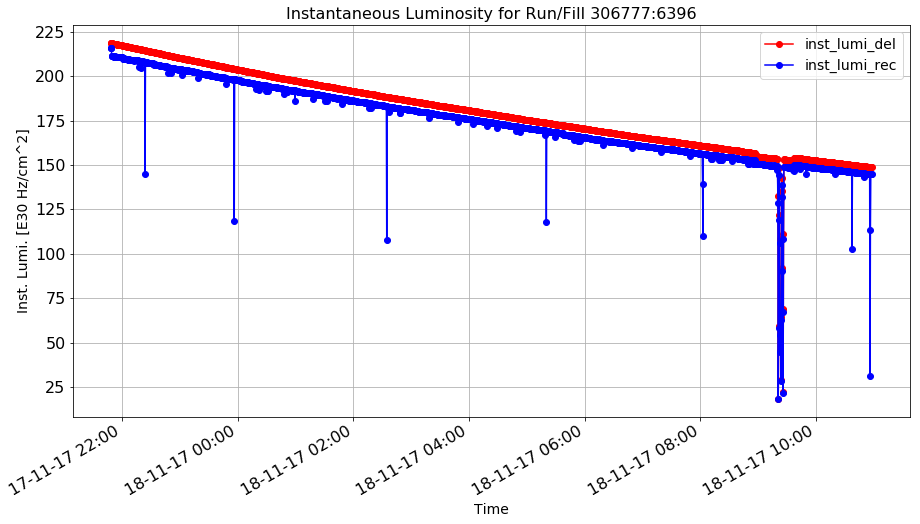

In [17]:
def plot_inst_lumi(x_val, y_val, z_val, title):
    import datetime
    import matplotlib.dates as mdates
    fig, ax = plt.subplots()
    plt.xlabel("Time")
    plt.ylabel("Inst. Lumi. [E30 Hz/cm^2]")
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
    ax.xaxis.set_major_formatter(xfmt)
    ax.grid()
    fig.autofmt_xdate()
    plt.plot(x_val, y_val, 'ro-')
    plt.plot(x_val, z_val, 'bo-')
    plt.title(title)
    plt.legend(loc="best")
    plt.show();
    
plot_inst_lumi(int_lumi["time"], int_lumi["inst_lumi_del"], int_lumi["inst_lumi_rec"], "Instantaneous Luminosity for Run/Fill "+int_lumi["run:fill"][2])

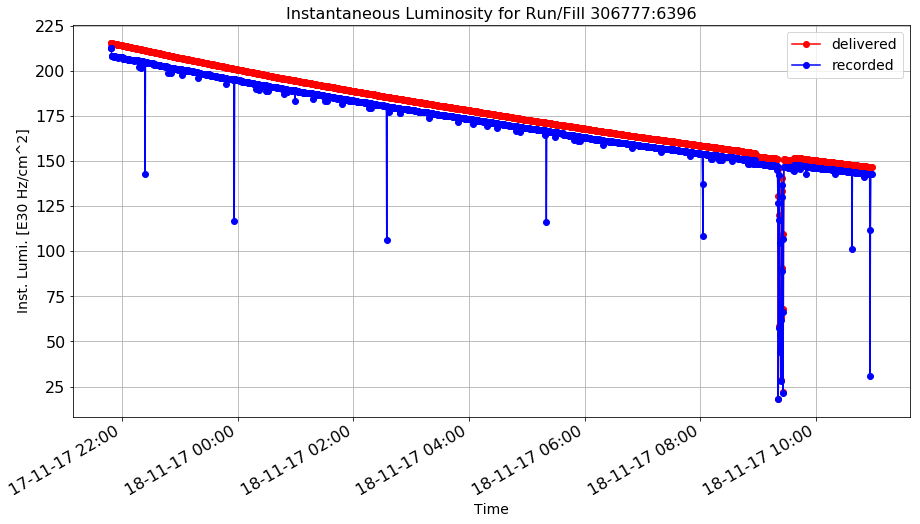

In [18]:
plot_inst_lumi(int_lumi2["time"], int_lumi2["delivered"], int_lumi2["recorded"], "Instantaneous Luminosity for Run/Fill "+int_lumi["run:fill"][2])

In [19]:
#int_lumi3 = pd.read_csv(("%s/lumi_per_bx.csv" % lumi_directory),
#           names=["run:fill", "ls", "time", "beamstatus", "energy", "delivered", "recorded", "avgpu", "source", "bx"])

In [20]:
#int_lumi3.drop(int_lumi3.index[[0,1,2034,2035,2036]], inplace=True)
#int_lumi3['run'], int_lumi2['fill'] = int_lumi3['run:fill'].str.split(':', 1).str
#int_lumi3['ls_start'], int_lumi2['ls_end'] = int_lumi3['ls'].str.split(':', 1).str

In [21]:
#print int_lumi3["bx"]

In [22]:
def convertToArray(data):
    temp = data.split()
    temp2 = map(lambda each:each.strip("["),temp)
    temp3 = map(lambda each:each.strip("]"),temp2)
    return temp3
#int_lumi3["bx"] = int_lumi3["bx"].apply(convertToArray)

In [23]:
#print int_lumi3["bx"].iloc[0]
#print len(int_lumi3["bx"].iloc[0])

In [24]:
def slice_it(data, size):
    temp = zip(*[iter(data)]*size)
    return temp

def splitArray(data):
    temp = map(float, data)
    temp2 = slice_it(temp, 3)
    return temp2

In [25]:
#int_lumi3["bx"] = int_lumi3["bx"].apply(splitArray)

In [26]:
#print int_lumi3["bx"].iloc[0]

In [27]:
#newdf = pd.DataFrame()
def transform(olddf):
    list = olddf.iloc[0]
    tempDF = pd.DataFrame(list, columns = ['BX', 'lumiDel', 'lumiRec'])
    for i in range(1, len(olddf)):
        list = olddf.iloc[i]
        tempDF = tempDF.append(pd.DataFrame(list, columns = ['BX', 'lumiDel', 'lumiRec']))
    return tempDF

In [28]:
#newdf = transform(int_lumi3["bx"])

In [29]:
#print newdf

In [83]:
rates_directory = "./rates"
df_rates = pd.read_csv(("%s/dt_rates.csv" % rates_directory),
           names=["run", "time", "board", "RPC1", "RPC2", "RPC3", "RPC4", "DT1", "DT2", "DT3", "DT4", "DT5"])
pd.to_datetime(df_rates["time"])
df_rates["run"] = df_rates["run"].astype('int')
df_rates["run"].dtype

dtype('int64')

In [84]:
#print df_rates

In [85]:
df_rates['wheel'], df_rates['sector'] = df_rates['board'].str.split('_', 1).str

In [86]:
#print df_rates

In [87]:
#for index, row in df_rates.iterrows():
#    if row["board"] == "YB+1_S4":
#        print row["board"], row["time"]

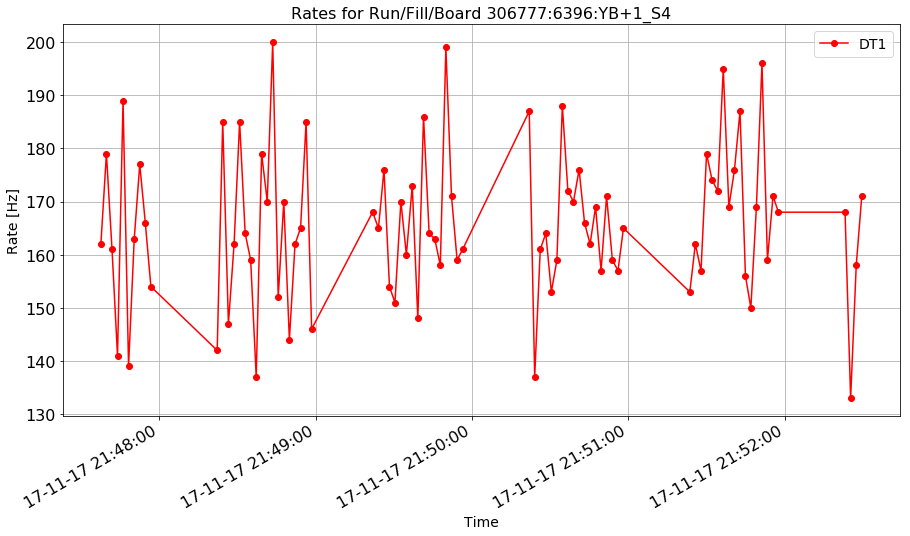

In [88]:
def plot_rate(df, x_val, y_val, z_val, title):
    df_temp = df.copy()
    crit = df_temp["board"] == z_val
    df_temp = df_temp[crit]
    #print df_temp
    import datetime
    import matplotlib.dates as mdates
    fig, ax = plt.subplots()
    plt.xlabel("Time")
    plt.ylabel("Rate [Hz]")
    ax.xaxis_date()
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.grid()
    fig.autofmt_xdate()
    plt.plot(df_temp[x_val], df_temp[y_val], 'ro-')
    plt.title(title)
    plt.legend(loc="best")
    plt.show();


plot_rate(df_rates, "time", "DT1", "YB+1_S4", "Rates for Run/Fill/Board "+int_lumi["run:fill"][2]+":YB+1_S4")

In [89]:
df_rates["ls"] = -1
df_rates["start"] = -1
df_rates["end"] = -1
df_rates["lumi"] = -1

#print df_rates["ls"]

In [90]:
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        result = (start <= x <= end)
        return result
    else:
        return start <= x or x <= end

def assignLS(df1, df2):
    j = 0
    for index1, row1 in df1.iterrows():
        run1 = row1["run"]
        rate_time = pd.to_datetime(row1["time"])
        time0 = df2["time"].iloc[0]
        if rate_time <= time0:
            continue;
        for index2, row2 in df2.iterrows():
            run2 = row2["run"]
            if (run1 != run2):
                continue;
            time1 = pd.to_datetime(row2["time"])
            time2 = pd.to_datetime(row2["time_end"])
            if time_in_range(time1, time2, rate_time):
                j = j + 1
                print j
                df1.set_value(index1, 'ls', row2["ls_start"])
                df1.set_value(index1, 'start', row2["time"])
                df1.set_value(index1, 'end', row2["time_end"])
                df1.set_value(index1, 'lumi', row2["delivered"])
                break
assignLS(df_rates, int_lumi2)

cazzo 1
cazzo 2
cazzo 3
cazzo 4
cazzo 5
cazzo 6
cazzo 7
cazzo 8
cazzo 9
cazzo 10
cazzo 11
cazzo 12
cazzo 13
cazzo 14
cazzo 15
cazzo 16
cazzo 17
cazzo 18
cazzo 19
cazzo 20
cazzo 21
cazzo 22
cazzo 23
cazzo 24
cazzo 25
cazzo 26
cazzo 27
cazzo 28
cazzo 29
cazzo 30
cazzo 31
cazzo 32
cazzo 33
cazzo 34
cazzo 35
cazzo 36
cazzo 37
cazzo 38
cazzo 39
cazzo 40
cazzo 41
cazzo 42
cazzo 43
cazzo 44
cazzo 45
cazzo 46
cazzo 47
cazzo 48
cazzo 49
cazzo 50
cazzo 51
cazzo 52
cazzo 53
cazzo 54
cazzo 55
cazzo 56
cazzo 57
cazzo 58
cazzo 59
cazzo 60
cazzo 61
cazzo 62
cazzo 63
cazzo 64
cazzo 65
cazzo 66
cazzo 67
cazzo 68
cazzo 69
cazzo 70
cazzo 71
cazzo 72
cazzo 73
cazzo 74
cazzo 75
cazzo 76
cazzo 77
cazzo 78
cazzo 79
cazzo 80
cazzo 81
cazzo 82
cazzo 83
cazzo 84
cazzo 85
cazzo 86
cazzo 87
cazzo 88
cazzo 89
cazzo 90
cazzo 91
cazzo 92
cazzo 93
cazzo 94
cazzo 95
cazzo 96
cazzo 97
cazzo 98
cazzo 99
cazzo 100
cazzo 101
cazzo 102
cazzo 103
cazzo 104
cazzo 105
cazzo 106
cazzo 107
cazzo 108
cazzo 109
cazzo 110
cazzo 11

cazzo 835
cazzo 836
cazzo 837
cazzo 838
cazzo 839
cazzo 840
cazzo 841
cazzo 842
cazzo 843
cazzo 844
cazzo 845
cazzo 846
cazzo 847
cazzo 848
cazzo 849
cazzo 850
cazzo 851
cazzo 852
cazzo 853
cazzo 854
cazzo 855
cazzo 856
cazzo 857
cazzo 858
cazzo 859
cazzo 860
cazzo 861
cazzo 862
cazzo 863
cazzo 864
cazzo 865
cazzo 866
cazzo 867
cazzo 868
cazzo 869
cazzo 870
cazzo 871
cazzo 872
cazzo 873
cazzo 874
cazzo 875
cazzo 876
cazzo 877
cazzo 878
cazzo 879
cazzo 880
cazzo 881
cazzo 882
cazzo 883
cazzo 884
cazzo 885
cazzo 886
cazzo 887
cazzo 888
cazzo 889
cazzo 890
cazzo 891
cazzo 892
cazzo 893
cazzo 894
cazzo 895
cazzo 896
cazzo 897
cazzo 898
cazzo 899
cazzo 900
cazzo 901
cazzo 902
cazzo 903
cazzo 904
cazzo 905
cazzo 906
cazzo 907
cazzo 908
cazzo 909
cazzo 910
cazzo 911
cazzo 912
cazzo 913
cazzo 914
cazzo 915
cazzo 916
cazzo 917
cazzo 918
cazzo 919
cazzo 920
cazzo 921
cazzo 922
cazzo 923
cazzo 924
cazzo 925
cazzo 926
cazzo 927
cazzo 928
cazzo 929
cazzo 930
cazzo 931
cazzo 932
cazzo 933
cazzo 934


cazzo 1599
cazzo 1600
cazzo 1601
cazzo 1602
cazzo 1603
cazzo 1604
cazzo 1605
cazzo 1606
cazzo 1607
cazzo 1608
cazzo 1609
cazzo 1610
cazzo 1611
cazzo 1612
cazzo 1613
cazzo 1614
cazzo 1615
cazzo 1616
cazzo 1617
cazzo 1618
cazzo 1619
cazzo 1620
cazzo 1621
cazzo 1622
cazzo 1623
cazzo 1624
cazzo 1625
cazzo 1626
cazzo 1627
cazzo 1628
cazzo 1629
cazzo 1630
cazzo 1631
cazzo 1632
cazzo 1633
cazzo 1634
cazzo 1635
cazzo 1636
cazzo 1637
cazzo 1638
cazzo 1639
cazzo 1640
cazzo 1641
cazzo 1642
cazzo 1643
cazzo 1644
cazzo 1645
cazzo 1646
cazzo 1647
cazzo 1648
cazzo 1649
cazzo 1650
cazzo 1651
cazzo 1652
cazzo 1653
cazzo 1654
cazzo 1655
cazzo 1656
cazzo 1657
cazzo 1658
cazzo 1659
cazzo 1660
cazzo 1661
cazzo 1662
cazzo 1663
cazzo 1664
cazzo 1665
cazzo 1666
cazzo 1667
cazzo 1668
cazzo 1669
cazzo 1670
cazzo 1671
cazzo 1672
cazzo 1673
cazzo 1674
cazzo 1675
cazzo 1676
cazzo 1677
cazzo 1678
cazzo 1679
cazzo 1680
cazzo 1681
cazzo 1682
cazzo 1683
cazzo 1684
cazzo 1685
cazzo 1686
cazzo 1687
cazzo 1688
cazzo 1689

cazzo 2349
cazzo 2350
cazzo 2351
cazzo 2352
cazzo 2353
cazzo 2354
cazzo 2355
cazzo 2356
cazzo 2357
cazzo 2358
cazzo 2359
cazzo 2360
cazzo 2361
cazzo 2362
cazzo 2363
cazzo 2364
cazzo 2365
cazzo 2366
cazzo 2367
cazzo 2368
cazzo 2369
cazzo 2370
cazzo 2371
cazzo 2372
cazzo 2373
cazzo 2374
cazzo 2375
cazzo 2376
cazzo 2377
cazzo 2378
cazzo 2379
cazzo 2380
cazzo 2381
cazzo 2382
cazzo 2383
cazzo 2384
cazzo 2385
cazzo 2386
cazzo 2387
cazzo 2388
cazzo 2389
cazzo 2390
cazzo 2391
cazzo 2392
cazzo 2393
cazzo 2394
cazzo 2395
cazzo 2396
cazzo 2397
cazzo 2398
cazzo 2399
cazzo 2400
cazzo 2401
cazzo 2402
cazzo 2403
cazzo 2404
cazzo 2405
cazzo 2406
cazzo 2407
cazzo 2408
cazzo 2409
cazzo 2410
cazzo 2411
cazzo 2412
cazzo 2413
cazzo 2414
cazzo 2415
cazzo 2416
cazzo 2417
cazzo 2418
cazzo 2419
cazzo 2420
cazzo 2421
cazzo 2422
cazzo 2423
cazzo 2424
cazzo 2425
cazzo 2426
cazzo 2427
cazzo 2428
cazzo 2429
cazzo 2430
cazzo 2431
cazzo 2432
cazzo 2433
cazzo 2434
cazzo 2435
cazzo 2436
cazzo 2437
cazzo 2438
cazzo 2439

cazzo 3098
cazzo 3099
cazzo 3100
cazzo 3101
cazzo 3102
cazzo 3103
cazzo 3104
cazzo 3105
cazzo 3106
cazzo 3107
cazzo 3108
cazzo 3109
cazzo 3110
cazzo 3111
cazzo 3112
cazzo 3113
cazzo 3114
cazzo 3115
cazzo 3116
cazzo 3117
cazzo 3118
cazzo 3119
cazzo 3120
cazzo 3121
cazzo 3122
cazzo 3123
cazzo 3124
cazzo 3125
cazzo 3126
cazzo 3127
cazzo 3128
cazzo 3129
cazzo 3130
cazzo 3131
cazzo 3132
cazzo 3133
cazzo 3134
cazzo 3135
cazzo 3136
cazzo 3137
cazzo 3138
cazzo 3139
cazzo 3140
cazzo 3141
cazzo 3142
cazzo 3143
cazzo 3144
cazzo 3145
cazzo 3146
cazzo 3147
cazzo 3148
cazzo 3149
cazzo 3150
cazzo 3151
cazzo 3152
cazzo 3153
cazzo 3154
cazzo 3155
cazzo 3156
cazzo 3157
cazzo 3158
cazzo 3159
cazzo 3160
cazzo 3161
cazzo 3162
cazzo 3163
cazzo 3164
cazzo 3165
cazzo 3166
cazzo 3167
cazzo 3168
cazzo 3169
cazzo 3170
cazzo 3171
cazzo 3172
cazzo 3173
cazzo 3174
cazzo 3175
cazzo 3176
cazzo 3177
cazzo 3178
cazzo 3179
cazzo 3180
cazzo 3181
cazzo 3182
cazzo 3183
cazzo 3184
cazzo 3185
cazzo 3186
cazzo 3187
cazzo 3188

cazzo 3853
cazzo 3854
cazzo 3855
cazzo 3856
cazzo 3857
cazzo 3858
cazzo 3859
cazzo 3860
cazzo 3861
cazzo 3862
cazzo 3863
cazzo 3864
cazzo 3865
cazzo 3866
cazzo 3867
cazzo 3868
cazzo 3869
cazzo 3870
cazzo 3871
cazzo 3872
cazzo 3873
cazzo 3874
cazzo 3875
cazzo 3876
cazzo 3877
cazzo 3878
cazzo 3879
cazzo 3880
cazzo 3881
cazzo 3882
cazzo 3883
cazzo 3884
cazzo 3885
cazzo 3886
cazzo 3887
cazzo 3888
cazzo 3889
cazzo 3890
cazzo 3891
cazzo 3892
cazzo 3893
cazzo 3894
cazzo 3895
cazzo 3896
cazzo 3897
cazzo 3898
cazzo 3899
cazzo 3900
cazzo 3901
cazzo 3902
cazzo 3903
cazzo 3904
cazzo 3905
cazzo 3906
cazzo 3907
cazzo 3908
cazzo 3909
cazzo 3910
cazzo 3911
cazzo 3912
cazzo 3913
cazzo 3914
cazzo 3915
cazzo 3916
cazzo 3917
cazzo 3918
cazzo 3919
cazzo 3920
cazzo 3921
cazzo 3922
cazzo 3923
cazzo 3924
cazzo 3925
cazzo 3926
cazzo 3927
cazzo 3928
cazzo 3929
cazzo 3930
cazzo 3931
cazzo 3932
cazzo 3933
cazzo 3934
cazzo 3935
cazzo 3936
cazzo 3937
cazzo 3938
cazzo 3939
cazzo 3940
cazzo 3941
cazzo 3942
cazzo 3943

In [91]:
print df_rates[df_rates["ls"] >= 0]

         run                        time     board     RPC1   RPC2    RPC3  \
600   306777  2017-11-17 21:48:22.161846    YB0_S1     1939   2784  141184   
601   306777  2017-11-17 21:48:22.161846    YB0_S2     7309   3950    4188   
602   306777  2017-11-17 21:48:22.161846    YB0_S3     2828  48839    2159   
603   306777  2017-11-17 21:48:22.161846    YB0_S4     2143   3311    3597   
604   306777  2017-11-17 21:48:22.161846    YB0_S5    23041   3780    2222   
605   306777  2017-11-17 21:48:22.161846    YB0_S6     3405  12124    2065   
606   306777  2017-11-17 21:48:22.161846    YB0_S7     1495   3402    3169   
607   306777  2017-11-17 21:48:22.161846    YB0_S8     1459   6925   52727   
608   306777  2017-11-17 21:48:22.161846    YB0_S9     2525   3705    2736   
609   306777  2017-11-17 21:48:22.161846   YB0_S10     2328   2978    2972   
610   306777  2017-11-17 21:48:22.161846   YB0_S11     9042   5030    2017   
611   306777  2017-11-17 21:48:22.161846   YB0_S12     4113   78